In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os



data = pd.read_csv('loan prediction.csv')

#Preprocessing
data.isnull().sum()

data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

#Dummy variable
data1=data.iloc[:,1:-1]#thus we dont need loan id
data1=pd.get_dummies(data1,columns=['Gender','Married','Dependents','Self_Employed','Education','Credit_History','Property_Area'],drop_first=True)

X= data1.values
y= data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)


In [3]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, max_depth = 3, min_samples_leaf = 5, random_state = 10)

In [4]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=10)

In [5]:
y_pred = classifier.predict(X_test)

In [6]:
print('Training Accuracy : {:.3f}'.format(classifier.score(X_train,y_train)))
print('Testing Accuracy : {:.3f}'.format(classifier.score(X_test,y_test)))

Training Accuracy : 0.811
Testing Accuracy : 0.812


In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
cm = confusion_matrix(y_test,y_pred, labels = ('Y','N'))
cm

array([[112,   1],
       [ 28,  13]], dtype=int64)

In [9]:
#Cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(classifier,X,y,cv =10)
print('{:.3f}'.format(accuracies.mean()))

0.810


In [10]:
#grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'min_samples_leaf': [2,5,10]}


In [13]:
CV_rfc = GridSearchCV(estimator = classifier,param_grid = param_grid,cv = 5)
CV_rfc.fit(X_train,y_train)
print(CV_rfc.best_score_.round(5))
y_pred = CV_rfc.predict(X_test)
print('Testing Accuracy: {:.3f}'.format(CV_rfc.score(X_test, y_test)))
print(CV_rfc.best_params_)

0.81087
Testing Accuracy: 0.812
{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 50}


In [14]:
classifier1 = RandomForestClassifier(n_estimators = 50, max_depth = 5, min_samples_leaf = 2, random_state = 10)

In [15]:
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

print('Training Accuracy : {:.3f}'.format(classifier1.score(X_train,y_train)))
print('Testing Accuracy : {:.3f}'.format(classifier1.score(X_test,y_test)))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred, labels = ('Y','N'))
cm

Training Accuracy : 0.820
Testing Accuracy : 0.812


array([[112,   1],
       [ 28,  13]], dtype=int64)

[(0.5, 'Credit_History_1.0'), (0.11, 'ApplicantIncome'), (0.1, 'LoanAmount'), (0.08, 'Property_Area_Semiurban'), (0.06, 'CoapplicantIncome'), (0.04, 'Loan_Amount_Term'), (0.03, 'Education_Not Graduate'), (0.02, 'Property_Area_Urban'), (0.02, 'Married_Yes'), (0.01, 'Self_Employed_Yes'), (0.01, 'Gender_Male'), (0.01, 'Dependents_2'), (0.01, 'Dependents_1'), (0.0, 'Dependents_3+')]


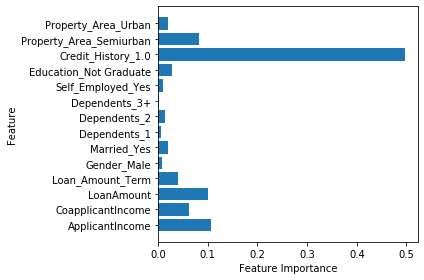

In [19]:
import matplotlib.pyplot as plt
import numpy as np
#Feature importance
n_features = data1.shape[1]
plt.barh(range(n_features),classifier.feature_importances_,align = 'center')
plt.yticks(np.arange(n_features),data1.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()

imp = list(zip(np.round(classifier.feature_importances_,2),data1.columns))
imp.sort(reverse  =True)
print(imp)